<a href="https://colab.research.google.com/github/sandeep8064/Machine-learning-/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Since Y is 1 dimensional we need to convert it into 2D cause Transform fun of feature scaling take only 2D array as input


In [5]:
 y = y.reshape(len(y),1)

In [6]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sx = StandardScaler()
sy = StandardScaler()
x = sx.fit_transform(x)
y = sy.fit_transform(y)

In [8]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [18]:
sy.inverse_transform(regressor.predict(sx.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

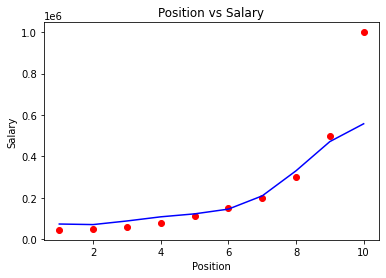

In [27]:
plt.scatter(sx.inverse_transform(x), sy.inverse_transform(y), color = 'red')
plt.plot(sx.inverse_transform(x), sy.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('Position vs Salary')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

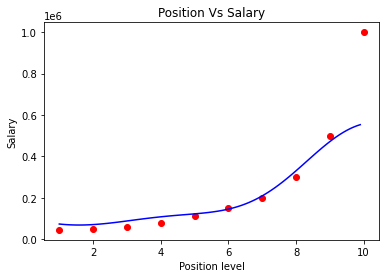

In [31]:
X_grid = np.arange(min(sx.inverse_transform(x)), max(sx.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sx.inverse_transform(x), sy.inverse_transform(y), color = 'red')
plt.plot(X_grid, sy.inverse_transform(regressor.predict(sx.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Position Vs Salary')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()